# Import

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/boopro-
[nltk_data]    |     prodesk-1/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/boopro-
[nltk_data]    |     prodesk-1/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/boopro-prodesk-1/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/boopro-prodesk-1/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/boopro-prodesk-1/nltk_data...
[nltk_data]    |   Package averaged_per

True

In [5]:
pd.set_option('display.max_colwidth', None)

# Read data

In [6]:
data = pd.read_csv('data/data.csv')
data

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral
...,...,...
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,negative
5838,Nordic Walking was first used as a summer training method by cross-country skiers .,neutral
5839,"According shipping company Viking Line , the EU decision will have a significant financial impact .",neutral
5840,"In the building and home improvement trade , sales decreased by 22.5 % to EUR 201.4 mn .",neutral


In [7]:

data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

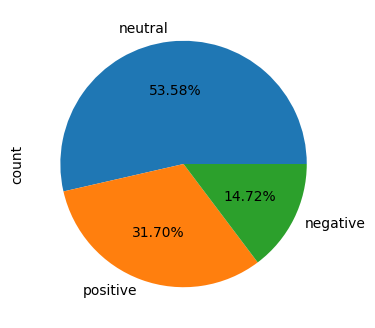

In [8]:

data.Sentiment.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(4,4))
plt.show()

# Preprocessing

In [9]:
def preprocess_text(text):
                                                      
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [10]:
data['Sentence'] = data['Sentence'].apply(preprocess_text)
data

,Sentence,Sentiment
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .",positive
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility",negative
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .",positive
3,"according finnish-russian chamber commerce , major construction company finland operating russia .",neutral
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .",neutral
...,...,...
5837,rising cost forced packaging producer huhtamaki axe 90 job hampshire manufacturing plant .,negative
5838,nordic walking first used summer training method cross-country skier .,neutral
5839,"according shipping company viking line , eu decision significant financial impact .",neutral
5840,"building home improvement trade , sale decreased 22.5 % eur 201.4 mn .",neutral


# Sentiment analysis

In [11]:

def get_sentiment(text):

    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0:
        sentiment = "positive"
    elif sentiment_score < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment



In [12]:
sentiment = dict()
sentiment['original'] = data['Sentence'].apply(get_sentiment)

sentiment

{'original': 0       positive
 1       positive
 2        neutral
 3       positive
 4       negative
           ...   
 5837    negative
 5838    positive
 5839    positive
 5840    negative
 5841    positive
 Name: Sentence, Length: 5842, dtype: object}

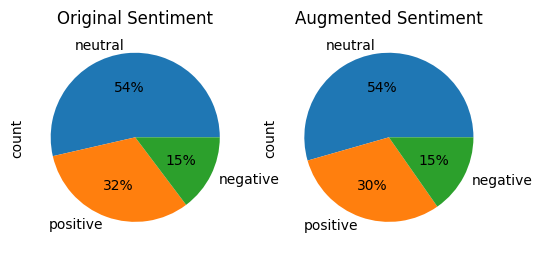

In [13]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2,1)
plt.title("Original Sentiment")
pie = data['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(1, 2,2)
plt.title("Augmented Sentiment")
pie = sentiment['original'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()

## helpers

In [14]:
results = dict()

def plt_result(types, n = data['Sentiment'].shape[0]):
    i=0
    for type in types:
        print('' , end='\n\n')
        print(type)
        print( classification_report(data['Sentiment'][:n], sentiment[type]))

        accuracy = accuracy_score(data['Sentiment'][:n], sentiment[type])
        results[type] = accuracy
        print('Accuracy:', accuracy)

        i+=1
        conf_matrix = confusion_matrix(data['Sentiment'][:n], sentiment[type])

        plt.subplot(3,3, i)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(type)
        plt.tight_layout()


# Easy data augmentation

## Char augmentation

In [15]:
insert_char = nac.RandomCharAug(action="insert")
substitute_char = nac.RandomCharAug(action="substitute")
swap_char = nac.RandomCharAug(action="swap")
delete_char = nac.RandomCharAug(action="delete")

In [16]:
def augment_char(text, type=None):
    if type == 'insert_char':
        return insert_char.augment(text, n=1)
    elif type == 'substitute_char':
        return substitute_char.augment(text, n=1)
    elif type == 'swap_char':
        return swap_char.augment(text, n=1)
    elif type == 'delete_char':
        return delete_char.augment(text, n=1)
    else:
        augmentations = [
            insert_char.augment(text, n=1),
            substitute_char.augment(text, n=1),
            swap_char.augment(text, n=1),
            delete_char.augment(text, n=1)
        ]
        return random.choice(augmentations)

In [17]:
augmented_char_text = []

for sen in data['Sentence']:
    lst_augment = augment_char(sen)
    augmented_char_text.append(lst_augment[0])
    
augmented_char_text

["geosolutions technology kleveRra%ge benefon ' s gps solution pPrrovidieng l$o@catXion based searncGh tecMhnoloMgxy, community platform, location ^rje9levant umulstimediZa $con_ten#t new powerful commercial model.",
 '$ esi low, $ 1. 50 $ 2. 50 bk erla posisbliiyt',
 "last quaUtkL 2010, P7mponentB ' s net sale doubled eur131m Euu76m pNriov year ea9lFeu, hoveL zvrk pre - tax profit pre - tax WBss eBr7g.",
 'cacodring ifnsnih - russian chamber commerce, major ocnsturtcoin company ifnland opaeritng russia.',
 'swedish buyu rm so remaining 22. 4 percent ske, almost eghtn month ting company public finland.',
 "$ spy Jkuld n ' t surprised see 9ree8 flosy",
 "Ihevl ' s $ 70 b_WlioL bg deal meet y)aaEholder skep^vWism",
 'ssh comm^nica2ixn security corp stock exchange release octlb1W 14, 2008 2: 45 pm company update full yedk o2Xrook esAi5atu result rXIain ll!s f2@l #ear.',
 "ZkonBe ' s net sale rose 14% $yeaXr - on - year fibrEst ni1nke Xmonjth Z200Q8.",
 "stockmann dGparlmeOt store tolae fl

In [18]:
char_data = pd.DataFrame({
    'Sentence': data['Sentence']
})

for type in ['insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    augmented_text = []
    for sen in data['Sentence']:
        augmented_text.append(augment_char(sen, type)[0])
    char_data[type] = augmented_text

In [19]:
char_data.head()

,Sentence,insert_char,substitute_char,swap_char,delete_char
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions t8ecPhn5ology leverage benfefaojn ' s gps solution JpZrovidinKg location based s2earEch technology, c%ommzuniOty platform, location 3relBeva@nt multimedia cGonotdent new powerful 0comJmerciabl model.","geosolutions technology (eveQaxe benefon ' s gps solution providing locUYgon ba@eF search technology, zo#munipy Yla8yorm, eoZatiYn re&evuMt multimedia conXePo new powerful commercial model.","geosolutions techonolyg leverage benefon ' s gps solution providgni location absde esarhc ecthonlogy, ocmnmuity platform, location rleevtan multimedia content new powerful commercial model.","geosolutions tehnooy leverage benefon ' s gps solution providing location based search technology, community platform, loaio eevan ultimdi cnte new poweu comrcil mol."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi low, $ 1. 50 $ 2. 50 bk r8ea8l pos#sibbOiflity","$ esi low, $ 1. 50 $ 2. 50 bk 4eKl possGBNlFty","$ esi low, $ 1. 50 $ 2. 50 bk erla psosibiityl","$ esi low, $ 1. 50 $ 2. 50 bk el psibilt"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","lZas)t quarter 20t1A0, VcoXmponen!ta ' s net saZl(e doubled beur3131jm @eu1r76m period year eaHrlAi1er, Nmovred zero pre - tax prpofAit pre - tax loss eur7m.","fasg quarter 2zH0, comp^nenjC ' s net 4a1e L1ubZed eur131m eur76m period yzWr #^rl2er, moved +eNo pre - tax prTpit pre - tax loss eur7m.","aslt quarter 2010, compnoneat ' s net sale doubled eu1r31m eru7m6 period yare aelrire, omvde zero pre - tax profit pre - tax lsso e7urm.","last quarter 10, componenta ' s net le doed ur31 e76m prio year arer, mod zero pre - tax profit pre - tax os eur7m."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","according Zfinn!insh - Ar3ussiacn chamber commerce, major con4sltruc3tifon company fPinlra0nd operating r)usbsia.","acY!rding f+n1ieh - russian P%aYber commerce, major 4BnstrucNi&n company finland operating lucsia.","according infnihs - ursisna hcamrbe commerce, major construction cpmoany finland poertanig russia.","arding nish - russian chamber commerce, major onrction mpay finland opring russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","sw7ed!is@h buyout firm sold zremJainin9g 22. 4 percent stake, almost eigchAteRen %mocnth takiiWng company public fiinlmanjd.","swedish buyoYA firm kol& Jemsi0ing 22. 4 percent stake, almost Anguteen month taking company nuKlic fiYmanl.","wsdeihs buyout firm sold ermaninig 22. 4 percent stake, almost eighteen month taking cmoapyn puiblc finland.","sweh buyout firm sl remann 22. 4 ernt stake, almost eiten ont taking company public finland."


In [20]:
for type in ['insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    
    sentiment[type] = char_data[type].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char
0,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral
2,neutral,neutral,neutral,neutral,positive
3,positive,positive,positive,positive,positive
4,negative,negative,negative,negative,negative
...,...,...,...,...,...
5837,negative,neutral,neutral,neutral,negative
5838,positive,positive,neutral,positive,positive
5839,positive,positive,neutral,positive,positive
5840,negative,neutral,neutral,neutral,neutral


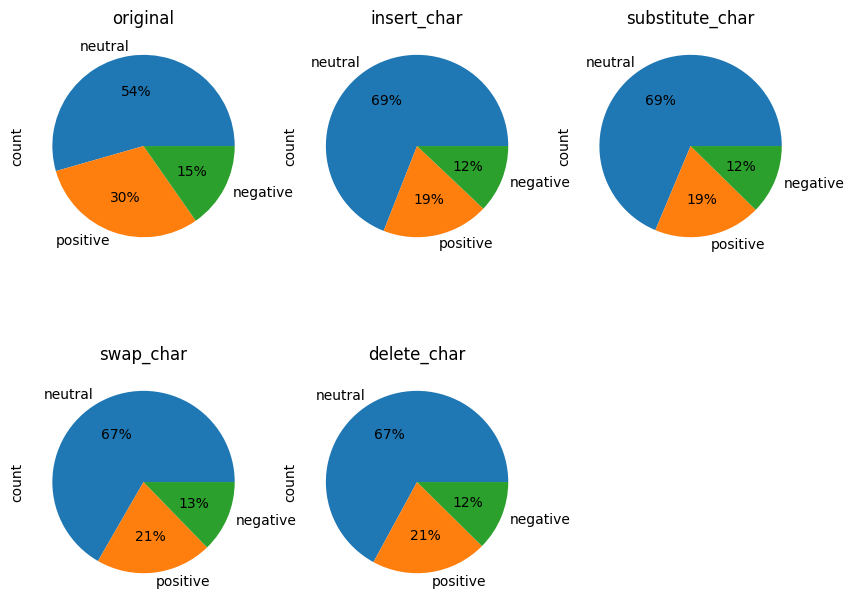

In [21]:
i = 0 
plt.figure(figsize=(10,8))
for type in ['original', 'insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    i += 1
    plt.subplot(2, 3, i)
    pie = sentiment[type].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(type)

plt.show()




original
              precision    recall  f1-score   support

    negative       0.24      0.25      0.25       860
     neutral       0.56      0.57      0.56      3130
    positive       0.41      0.39      0.40      1852

    accuracy                           0.46      5842
   macro avg       0.40      0.40      0.40      5842
weighted avg       0.46      0.46      0.46      5842

Accuracy: 0.4642245806230743


insert_char
              precision    recall  f1-score   support

    negative       0.26      0.21      0.23       860
     neutral       0.56      0.72      0.63      3130
    positive       0.38      0.22      0.28      1852

    accuracy                           0.49      5842
   macro avg       0.40      0.39      0.38      5842
weighted avg       0.46      0.49      0.46      5842

Accuracy: 0.4875042793563848


substitute_char
              precision    recall  f1-score   support

    negative       0.25      0.21      0.23       860
     neutral       0.56     

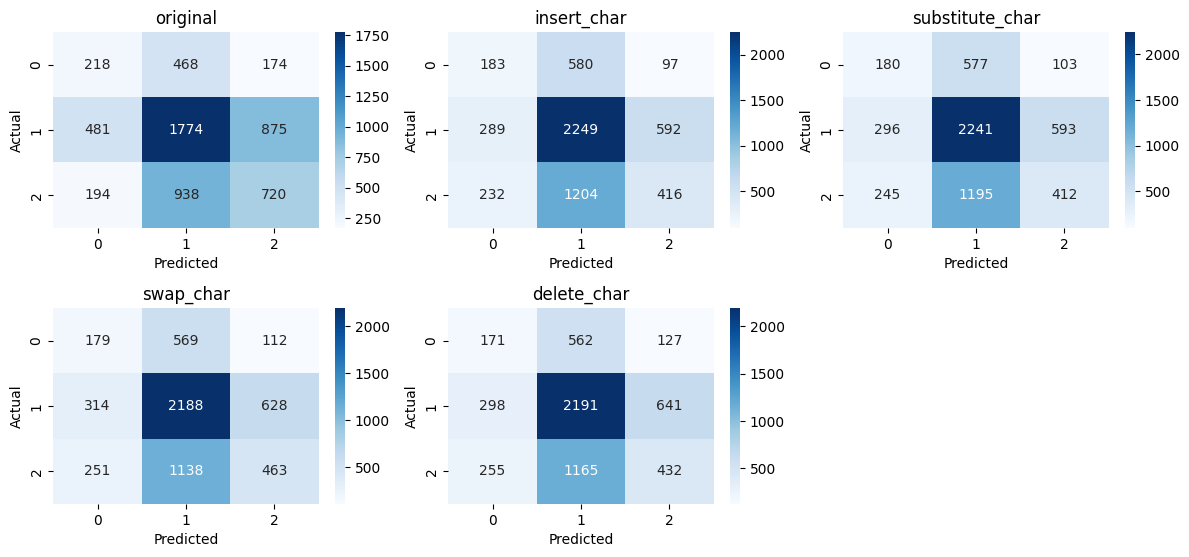

In [22]:
plt.figure(figsize=(12,8))
plt_result(['original', 'insert_char', 'substitute_char', 'swap_char', 'delete_char'])
plt.show()

In [23]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy'])

,Augmentation Type,Accuracy
0,original,0.464225
1,insert_char,0.487504
2,substitute_char,0.484937
3,swap_char,0.484423
4,delete_char,0.478261


## Word augmentation

In [24]:


def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words[:]
    random_words = list(set(words))
    random.shuffle(random_words)
    num_replaced = 0
    for random_word in random_words:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Replace up to n words with synonyms
            break
    return ' '.join(new_words)

def random_insertion(text, n=2):
    words = text.split()
    for _ in range(n):
        synonym_word = random.choice(words)
        synonyms = get_synonyms(synonym_word)
        if synonyms:
            random_synonym = random.choice(synonyms)
            insert_index = random.randint(0, len(words)-1)
            words.insert(insert_index, random_synonym)
    return ' '.join(words)

def random_swap(text, n=2):
    words = text.split()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_deletion(text, p=0.2):
    words = text.split()
    if len(words) == 1: 
        return text
    new_words = [word for word in words if random.uniform(0, 1) > p]
    return ' '.join(new_words) if new_words else random.choice(words)


In [25]:

def augment_text(text, type=None):
    if type == 'synonym_replacement':
        return synonym_replacement(text)
    elif type == 'random_insertion':
        return random_insertion(text)
    elif type == 'random_swap':
        return random_swap(text)
    elif type == 'random_deletion':
        return random_deletion(text)
    else:
        augmentations = [
            synonym_replacement(text),
            random_insertion(text),
            random_swap(text),
            random_deletion(text)
        ]
        return random.choice(augmentations)

In [26]:
augmented_text = []

for sen in data['Sentence']:
    augmented_text.append(augment_text(sen))

augmented_text

['geosolutions leverage benefon gps solution providing location search technology , community platform , relevant content new powerful commercial model',
 '$ esi low-spirited , $ 1.50 $ 2.50 bk existent possibility',
 "last quarter year , componenta 's net sale doubled profit eur76m period 2010 earlier , moved zero pre-tax eur131m pre-tax loss eur7m .",
 'according finnish-russian chamber commerce major construction company finland russia .',
 'swedish buyout firm sold remaining 22.4 percent stake , almost eighteen calendar_month taking company public Republic_of_Finland .',
 "$ close would n't surprised green see spy",
 "eggshell 's $ LXX billion bg deal meet shareholder skepticism",
 'ssh communication security corp stock exchange release october 14 , 2008 2:45 pm company update full year count_on phase_modulation outlook estimate result remain loss full year .',
 "kone 's sale rose 14 % year-on-year first nine month 2008 .",
 'store total floor space 8,000 metre stockmann project pr

In [27]:
word_data = pd.DataFrame({
    'Sentence': data['Sentence']
})

for type in ['synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    augmented_text = []
    for sen in data['Sentence']:
        augmented_text.append(augment_text(sen, type))
    word_data[type] = augmented_text

In [28]:
word_data.head()

,Sentence,synonym_replacement,random_insertion,random_swap,random_deletion
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions technology leverage benefon 's gps resolution providing location based look technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions technology leverage benefon 's gps solution providing location based community_of_interests search technology , community platform , location relevant multimedia content new powerful commercial model .","leverage powerful geosolutions benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new technology commercial model .","geosolutions technology leverage gps providing location based search technology community platform , location relevant content new powerful commercial model ."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi blue , $ 1.50 $ 2.50 bk tangible possibility","possible_action $ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi low possibility , 1.50 $ 2.50 bk real $","$ esi , 1.50 $ 2.50 bk possibility"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , prompt zero pre-tax profit pre-tax expiration eur7m .","last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year in_the_beginning earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter eur131m , componenta 's net sale doubled 2010 eur76m period year earlier , moved zero pre-tax profit pre-tax . eur7m loss","last 2010 , componenta 's net year earlier , moved zero pre-tax loss ."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","according finnish-russian chamber commercialism , Major construction company finland operating russia .","according finnish-russian chamber commerce , major construction company finland operating russia .","according finnish-russian chamber commerce operating construction major company finland , russia .","according finnish-russian chamber , major construction company finland operating russia ."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish buyout firm sold remaining 22.4 percentage stake , almost eighteen month call_for company public finland .","calendar_month swedish buyout firm sold remaining 22.4 percent Swedish stake , almost eighteen month taking company public finland .","swedish buyout sold firm almost 22.4 percent stake , remaining eighteen month taking company public finland .","swedish buyout firm 22.4 percent stake , almost eighteen month taking company public finland"


In [29]:
for type in ['synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    sentiment[type] = word_data[type].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char,synonym_replacement,random_insertion,random_swap,random_deletion
0,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral,neutral,positive,positive,neutral
2,neutral,neutral,neutral,neutral,positive,neutral,neutral,neutral,neutral
3,positive,positive,positive,positive,positive,negative,positive,positive,positive
4,negative,negative,negative,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...
5837,negative,neutral,neutral,neutral,negative,negative,negative,negative,negative
5838,positive,positive,neutral,positive,positive,positive,positive,positive,positive
5839,positive,positive,neutral,positive,positive,positive,positive,positive,neutral
5840,negative,neutral,neutral,neutral,neutral,neutral,negative,negative,neutral


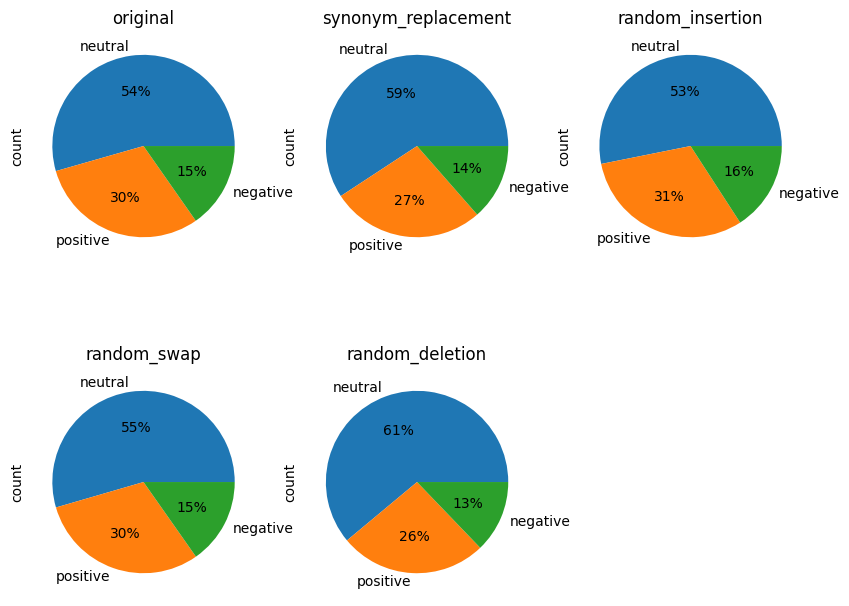

In [30]:

i = 0 
plt.figure(figsize=(10,8))
for type in ['original', 'synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    i += 1
    plt.subplot(2, 3, i)
    pie = sentiment[type].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(type)

plt.show()




synonym_replacement
              precision    recall  f1-score   support

    negative       0.23      0.21      0.22       860
     neutral       0.55      0.61      0.58      3130
    positive       0.40      0.35      0.37      1852

    accuracy                           0.47      5842
   macro avg       0.39      0.39      0.39      5842
weighted avg       0.46      0.47      0.46      5842

Accuracy: 0.46679219445395415


random_insertion
              precision    recall  f1-score   support

    negative       0.24      0.26      0.25       860
     neutral       0.56      0.55      0.55      3130
    positive       0.40      0.40      0.40      1852

    accuracy                           0.46      5842
   macro avg       0.40      0.40      0.40      5842
weighted avg       0.46      0.46      0.46      5842

Accuracy: 0.45977404998288257


random_swap
              precision    recall  f1-score   support

    negative       0.25      0.26      0.25       860
     neutral  

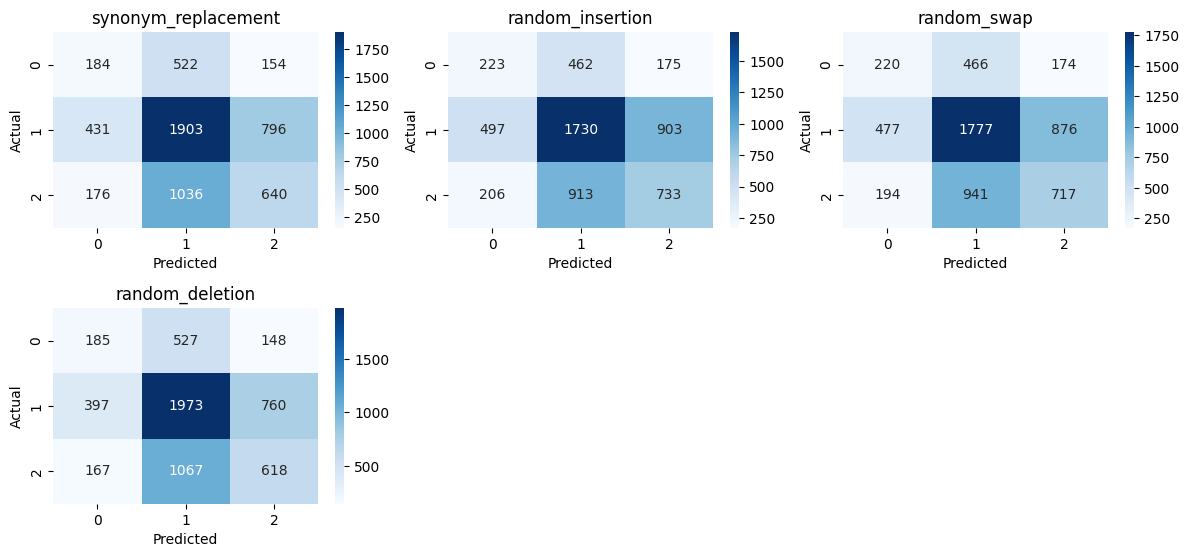

In [31]:
plt.figure(figsize=(12,8))
plt_result([ 'synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion'])
plt.show()


In [32]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy'])


,Augmentation Type,Accuracy
0,original,0.464225
1,insert_char,0.487504
2,substitute_char,0.484937
3,swap_char,0.484423
4,delete_char,0.478261
5,synonym_replacement,0.466792
6,random_insertion,0.459774
7,random_swap,0.464567
8,random_deletion,0.475180


# Insert word by contextual word embeddings (BERT, RoBERTA)

## Bert

In [35]:
aug_bert = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

augmented_bert_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = aug_bert.augment(sen)
#     augmented_bert_text.append(lst_augment[0])
    

/home/boopro-prodesk-1/Documents/elfak/data preprocessing/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-07 15:58:50.192325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 15:58:50.192406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 15:58:50.193767: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 15:58:50.201540: I tensorflow/core/platform/cpu_feature_

In [ ]:

# pd.DataFrame({
#     'original':data['Sentence'][0:500],
#     'augmented':augmented_bert_text
# }).to_csv("data/augmented_bert_data.csv", index=False)


In [36]:
bert_data = pd.read_csv('./data/augmented_bert_data.csv')
bert_data

,original,augmented
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions online technology leverage benefon ' ® s patented gps applications solution providing location based search based technology, community support platform, location relevant information multimedia web content is new powerful commercial delivery model."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ 50 esi is low, $ 1. 99 50 $ 2. 75 50 50 bk real possibility"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","by last quarter 2010, componenta ' s s net international sale doubled eur131m eur76m period per year from earlier, moved in zero to pre - tax profit from pre - debt tax employee loss eur7m."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","source according finnish - registered russian chamber commerce, three major construction projects company finland operating for russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish stock buyout after firm sold remaining 22. 4 percent stake, got almost eighteen that month for taking german company public finland."
...,...,...
495,"february 2011 , new wording identity document act make mobile id state-approved electronic document february 1st 2011 entered force .","february 2011, government new wording identity document act make mobile id state - approved free electronic document filed february to 1st april 2011 it entered civil force."
496,"antti orkola , president kemira growhow 's industrial solution unit , told thomson financial news company put opening mine price phosphate ` quite depressed long time ' . '","antti orkola, president in kemira growhow ' s national industrial solution design unit, told the thomson financial corporation news company i put into opening mine the price of phosphate ` quite depressed of long time '. '"
497,'re alone .,' why re not alone.
498,"2009 3 february 2010 - finland-based steel maker rautaruukki oyj ( hel : rtrks ) , ruukki , said today slipped larger-than-expected pretax loss eur46m fourth quarter 2009 year-earlier profit eur45m .","2009 may 3 3 february 2010 - finland - based steel maker rautaruukki oyj ( hel : rtrks ), named ruukki, was said today have slipped larger - than - average expected pretax loss eur46m fourth of quarter of 2009 5th year - earlier profit loss eur45m."


In [37]:
sentiment['bert'] = bert_data['augmented'].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char,synonym_replacement,random_insertion,random_swap,random_deletion,bert
0,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral,neutral,positive,positive,neutral,positive
2,neutral,neutral,neutral,neutral,positive,neutral,neutral,neutral,neutral,neutral
3,positive,positive,positive,positive,positive,negative,positive,positive,positive,positive
4,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...
5837,negative,neutral,neutral,neutral,negative,negative,negative,negative,negative,NaN
5838,positive,positive,neutral,positive,positive,positive,positive,positive,positive,NaN
5839,positive,positive,neutral,positive,positive,positive,positive,positive,neutral,NaN
5840,negative,neutral,neutral,neutral,neutral,neutral,negative,negative,neutral,NaN


In [38]:
sentiment['bert'].value_counts()

augmented
positive    200
neutral     196
negative    104
Name: count, dtype: int64

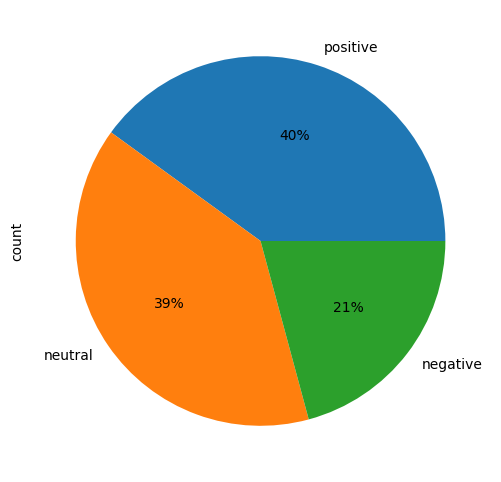

In [39]:

plt.figure(figsize=(6,6))

pie = sentiment['bert'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()



bert
              precision    recall  f1-score   support

    negative       0.26      0.34      0.30        79
     neutral       0.61      0.43      0.51       278
    positive       0.37      0.52      0.43       143

    accuracy                           0.44       500
   macro avg       0.41      0.43      0.41       500
weighted avg       0.49      0.44      0.45       500

Accuracy: 0.442


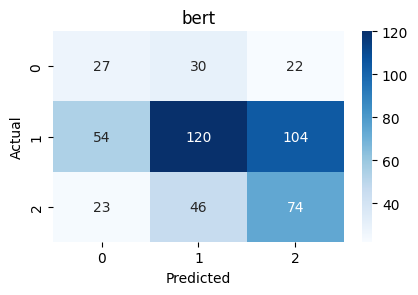

In [40]:
plt.figure(figsize=(12,8))
plt_result(['bert'], 500)
plt.show()

## Roberta

In [41]:

aug_roberta = naw.ContextualWordEmbsAug(model_path='roberta-base', action="substitute")

# augmented_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = aug_roberta.augment(sen)
#     augmented_text.append(lst_augment[0])
    
# augmented_text


# pd.DataFrame({
#     'original':data['Sentence'][:500],
#     'augmented':augmented_text
# }).to_csv("data/augmented_roberta_data.csv", index=False)

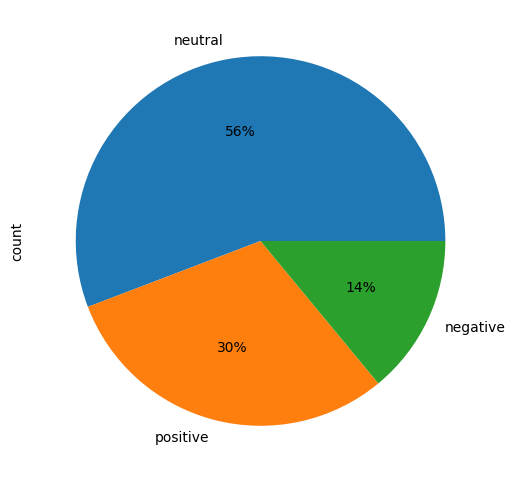



roberta
              precision    recall  f1-score   support

    negative       0.17      0.15      0.16        79
     neutral       0.57      0.58      0.57       278
    positive       0.33      0.35      0.34       143

    accuracy                           0.44       500
   macro avg       0.36      0.36      0.36       500
weighted avg       0.44      0.44      0.44       500

Accuracy: 0.444


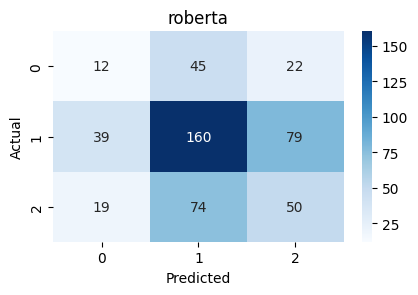

In [42]:
roberta_data = pd.read_csv('./data/augmented_roberta_data.csv')
roberta_data

sentiment['roberta'] = roberta_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)

plt.figure(figsize=(6,6))
pie = sentiment['roberta'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

plt.figure(figsize=(12,8))
plt_result(['roberta'], 500)
plt.show()

# Contextual Word Embeddings for Sentence

In [43]:

aug_gpt = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2',device='cpu')

# augmented_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = aug_gpt.augment(sen)
#     augmented_text.append(lst_augment[0])
    
# augmented_text
# pd.DataFrame({
#     'original':data['Sentence'][:500],
#     'augmented':augmented_text
# }).to_csv("data/augmented_gpt_data.csv", index=False)

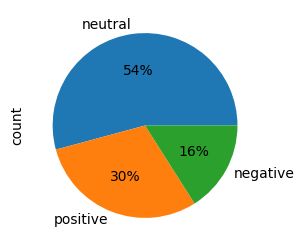



gpt
              precision    recall  f1-score   support

    negative       0.25      0.25      0.25        79
     neutral       0.59      0.57      0.58       278
    positive       0.38      0.39      0.38       143

    accuracy                           0.47       500
   macro avg       0.40      0.41      0.40       500
weighted avg       0.47      0.47      0.47       500

Accuracy: 0.47


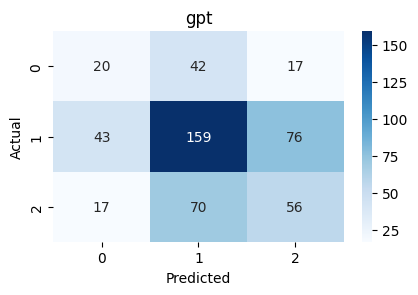

In [44]:


gpt_data = pd.read_csv('./data/augmented_gpt_data.csv')
gpt_data

sentiment['gpt'] = gpt_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)

plt.figure(figsize=(3,3))
pie = sentiment['gpt'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

plt.figure(figsize=(12,8))
plt_result(['gpt'], 500)
plt.show()

# Flow

To make use of multiple augmentation, sequential and sometimes pipelines are introduced to connect augmenters.

Sequential pipeline

In [45]:

sequential = naf.Sequential([
    nac.RandomCharAug(action="insert"),
    naw.RandomWordAug()
])

In [46]:
augmented_sequential_text = []

for sen in data['Sentence']:
    lst_augment = sequential.augment(sen)
    augmented_sequential_text.append(lst_augment[0])

sequential_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sequential_text
}) #.to_csv("augmented_sequential_data.csv", index=False)



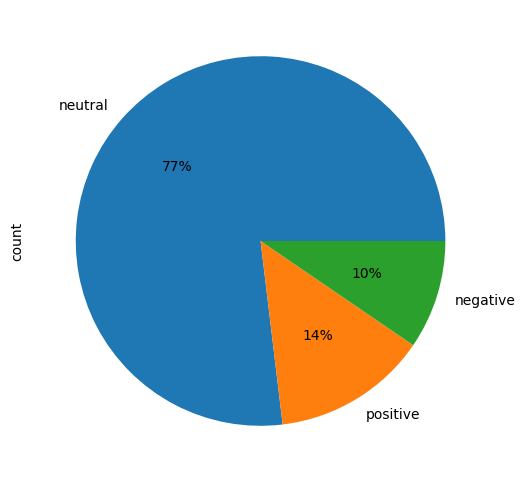



sequential
              precision    recall  f1-score   support

    negative       0.24      0.16      0.19       860
     neutral       0.56      0.80      0.66      3130
    positive       0.37      0.16      0.22      1852

    accuracy                           0.50      5842
   macro avg       0.39      0.37      0.36      5842
weighted avg       0.45      0.50      0.45      5842

Accuracy: 0.5030811365970558


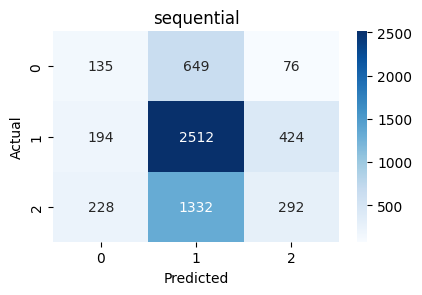

In [47]:

sentiment['sequential'] = sequential_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(6,6))
pie = sentiment['sequential'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['sequential'])
plt.show()

Sometimes pipeline

In [48]:
sometimes = naf.Sometimes([
    nac.RandomCharAug(action="delete"),
    nac.RandomCharAug(action="insert"),
    naw.RandomWordAug()
])

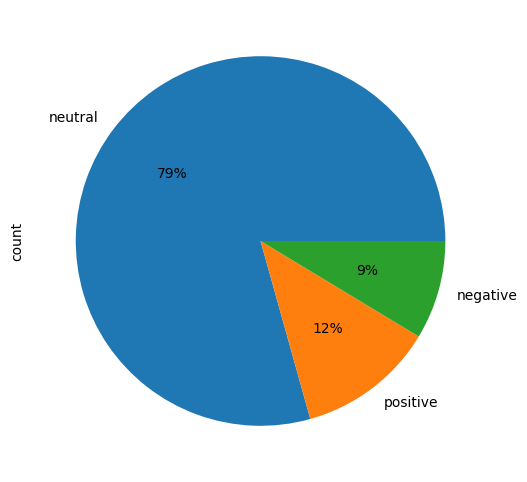



sometimes
              precision    recall  f1-score   support

    negative       0.25      0.15      0.19       860
     neutral       0.55      0.82      0.66      3130
    positive       0.35      0.13      0.19      1852

    accuracy                           0.50      5842
   macro avg       0.39      0.37      0.35      5842
weighted avg       0.44      0.50      0.44      5842

Accuracy: 0.5029099623416639


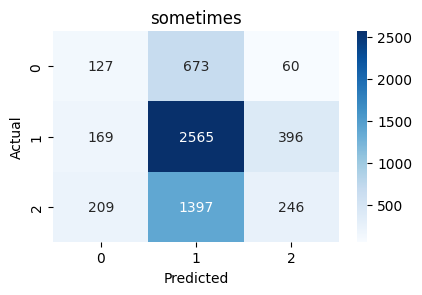

In [49]:
augmented_sometimes_text = []

for sen in data['Sentence']:
    lst_augment = sometimes.augment(sen)
    augmented_sometimes_text.append(lst_augment[0])

sometimes_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sometimes_text
}) #.to_csv("data/augmented_sometimes_data.csv", index=False)


sentiment['sometimes'] = sometimes_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(6,6))
pie = sentiment['sometimes'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['sometimes'])
plt.show()


In [50]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

,Augmentation Type,Accuracy
12,sequential,0.503081
13,sometimes,0.502910
1,insert_char,0.487504
2,substitute_char,0.484937
3,swap_char,0.484423
4,delete_char,0.478261
8,random_deletion,0.475180
11,gpt,0.470000
5,synonym_replacement,0.466792
7,random_swap,0.464567
